# Génération d'un graphe orienté aléatoire avec matrice d'adjacence pondérée

Ce notebook a pour objectif de générer un graphe orienté aléatoire avec une densité contrôlable, pondéré ou non, et d'afficher sa matrice d'adjacence au format exploitable dans des exercices.

Nous utiliserons la bibliothèque **NetworkX** pour la manipulation du graphe, **NumPy** pour les matrices, et **Matplotlib** pour la visualisation.


In [11]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

## Fonction d'affichage de matrice

La fonction suivante permet d'afficher une matrice dans un format lisible, pour l'intégrer à l'énoncé de notre projet.


In [12]:
def afficher_matrice_style_zone(matrice, nom="matrix_zone"):
    print(f"{nom} = [")
    for ligne in matrice:
        ligne_str = ", ".join(f"{int(val)}" for val in ligne)
        print(f"    [{ligne_str}],")
    print("]")


## Fonction de génération du graphe orienté

La fonction suivante permet de :
- Générer un graphe orienté aléatoire avec un nombre donné de sommets.
- Ajouter des arêtes avec des poids (aléatoires si `pondere=True`).
- S'assurer que le graphe est faiblement connexe.
- Produire une matrice d'adjacence correspondant au graphe.
- Afficher le graphe et la matrice si `afficher=True`.


In [13]:
def genere_graphe_oriente(n_sommets: int, densite: float = 0.3, pondere=True, afficher=False, nom_matrice="matrix_zone_A"):
    if n_sommets < 3:
        raise ValueError("Le graphe doit avoir au moins 3 sommets.")

    sommets = list(range(1, n_sommets + 1))
    G = nx.DiGraph()
    G.add_nodes_from(sommets)

    max_arcs = n_sommets * (n_sommets - 1)
    n_arcs = int(densite * max_arcs)

    arcs_ajoutes = set()
    while len(arcs_ajoutes) < n_arcs:
        u, v = random.sample(sommets, 2)
        if (u, v) not in arcs_ajoutes:
            poids = random.randint(1, 10) if pondere else 1
            G.add_edge(u, v, weight=poids)
            arcs_ajoutes.add((u, v))

    if not nx.is_weakly_connected(G):
        composants = list(nx.weakly_connected_components(G))
        for i in range(len(composants) - 1):
            u = random.choice(list(composants[i]))
            v = random.choice(list(composants[i + 1]))
            if (u, v) not in arcs_ajoutes:
                poids = random.randint(1, 10) if pondere else 1
                G.add_edge(u, v, weight=poids)
                arcs_ajoutes.add((u, v))

    sommets_ordonnes = sorted(G.nodes())
    mat_adj = nx.to_numpy_array(G, nodelist=sommets_ordonnes, weight='weight', dtype=int)

    if afficher:
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_color='lightblue', arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.title("Graphe orienté aléatoire (sommets 1-based)")
        plt.show()

    afficher_matrice_style_zone(mat_adj, nom=nom_matrice)

    return G, mat_adj


## Exemple d'utilisation

Nous générons un graphe de 6 sommets avec une densité de 40%, pondéré, et avec affichage graphique activé.


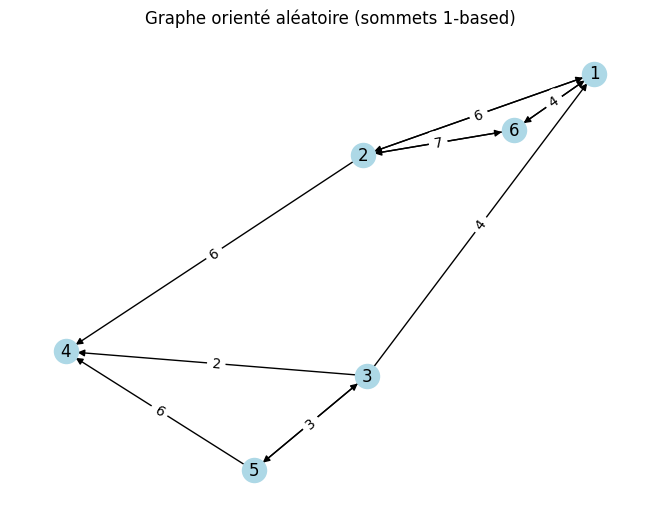

mat_zone_exemple = [
    [0, 2, 0, 0, 0, 7],
    [6, 0, 0, 6, 0, 6],
    [4, 0, 0, 2, 9, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 6, 0, 0],
    [4, 7, 0, 0, 0, 0],
]


In [22]:
G, matrice = genere_graphe_oriente(n_sommets=6, densite=0.4, pondere=True, afficher=True, nom_matrice="mat_zone_exemple")
